# Stadium Billiard

In [5]:
import numpy as np
from shapely.geometry import LineString
import matplotlib.pyplot as plt

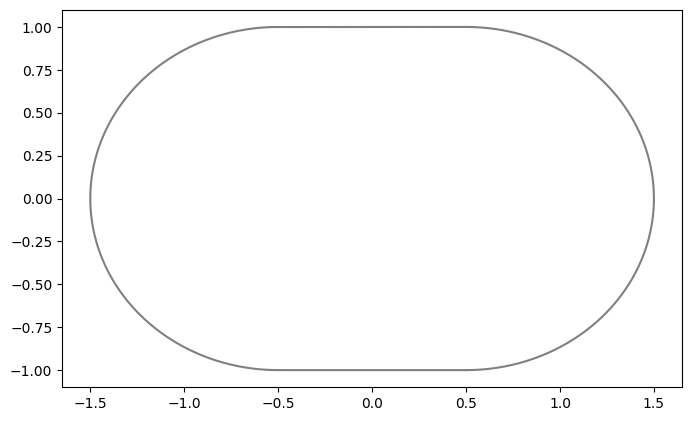

In [34]:
r = 1
l = 0.5

angle_p = np.linspace(-np.pi/2, np.pi/2, 180)  
xc_p = r*np.cos(angle_p)+l
yc_p = r*np.sin(angle_p)

angle_m = np.linspace(np.pi/2, 3*np.pi/2, 180)  
xc_m = r*np.cos(angle_m)-l
yc_m = r*np.sin(angle_m)

xl = np.linspace(-l,l,100)
xs = np.concatenate((xc_p,xl,xc_m,xl), axis=None)
ys = np.concatenate((yc_p,xl/xl,yc_m,-xl/xl), axis=None)

fig, ax = plt.subplots(figsize=(8,5),dpi=100) 

ax.plot(xs,ys,color="grey") 

boundary = LineString(np.column_stack((xs,ys)))

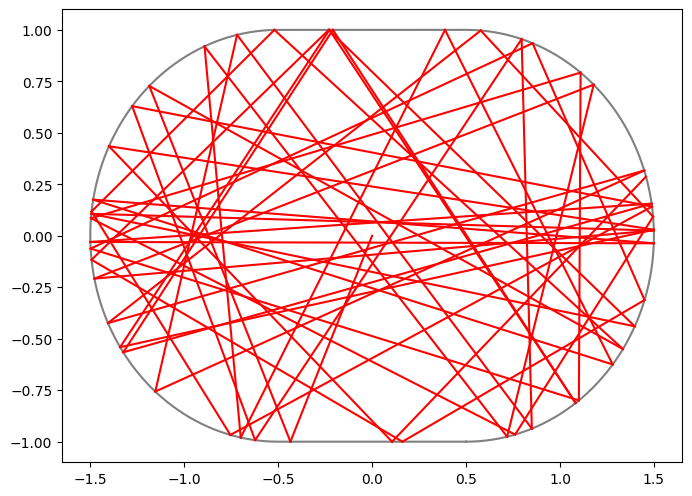

In [69]:
fig, ax = plt.subplots(figsize=(8,6),dpi=100) 
ax.plot(xs,ys,color="grey") 
boundary = LineString(np.column_stack((xs,ys)))

# Ball starting point and speed components
x0 = 0
y0 = 0
vx = -1
vy = -2.3

# number of bounces
Nb = 50

# spatial increment for animation rendering
dx = 0.2

# global trajectory
X = []
Y = []

for _ in range(Nb):
    
    # define trajectory crossing the boundary
    xt = np.linspace(x0+r/100*vx, x0+3*r*vx, 100)  
    yt = np.linspace(y0+r/100*vy, y0+3*r*vy, 100)
    trajectory = LineString(np.column_stack((xt,yt)))

    # find intersection
    intersection = boundary.intersection(trajectory)
    xb,yb = intersection.xy
        
    # draw path to intersection
    d = np.sqrt((xb[0]-x0)**2+(yb[0]-y0)**2) # traveled distance
    NP = int(d/dx) # number of points to store for animation
    x = np.linspace(x0,xb[0],NP)  
    y = np.linspace(y0,yb[0],NP)
    ax.plot(x,y,'-',color="red")
    
    # save path segment points for animation, 
    # removing first point to avoid double counting
    X = np.concatenate((X, x[1:]), axis=None)
    Y = np.concatenate((Y, y[1:]), axis=None)
    
    x0 = xb[0]
    y0 = yb[0]
    # compute new speed components after collision
    if x0>l: # semicircle on the right
        vx,vy = vx-2*(vx*(x0-l)/r+vy*y0/r)*(x0-l)/r, vy-2*(vx*(x0-l)/r+vy*y0/r)*y0/r
    elif x0<-l: # semicircle on the left
        vx,vy = vx-2*(vx*(x0+l)/r+vy*y0/r)*(x0+l)/r, vy-2*(vx*(x0+l)/r+vy*y0/r)*y0/r
    else: # straight sections
        vy = -vy

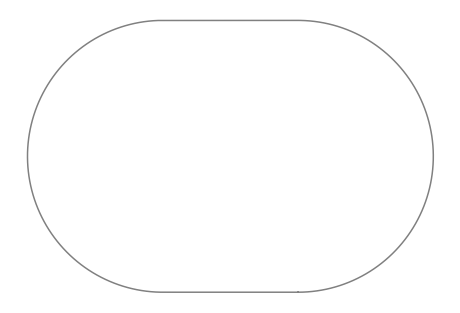

In [70]:
fig, ax = plt.subplots(figsize=(8,5.5),dpi=72) 
ax.plot(xs,ys,color="grey")
trail, = ax.plot([],[],'-',color="red")
ball, = ax.plot([],[],'o',color="red",markersize=10)
plt.axis('off')
plt.show()

In [71]:
 from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

def billiard_init():
    trail.set_data([], [])
    ball.set_data([x0],[y0])
    return (trail,ball)

def billiard_animate(i):
    if i<len(X)-1:
        trail.set_data(X[:i+1],Y[:i+1])
    else:
        trail.set_data(X[:i],Y[:i])
    ball.set_data(X[i],Y[i])
    return (trail,ball)

anim = FuncAnimation(fig,billiard_animate,frames=range(len(X)),init_func=billiard_init,blit=True)

In [72]:
HTML(anim.to_html5_video())

In [74]:
anim.save('movies/stadiumbilliard.mp4', writer=FFMpegWriter(fps=30))

In [73]:
anim.save('gifs/stadiumbilliard.gif', writer='imagemagick', fps=30)

In [75]:
Image(url='gifs/stadiumbilliard.gif')